In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\Therton_F\Downloads\DA\Python\CB\income.csv", names=["name","income"], skiprows=[0])
df

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [5]:
df.describe()

,income
count,7.000000e+00
mean,1.433929e+06
std,3.777283e+06
min,4.000000e+03
25%,5.500000e+03
50%,7.000000e+03
75%,7.750000e+03
max,1.000000e+07


In [ ]:
df.income.quantile(0.75)

7750.0

In [ ]:
df.income.quantile(0.45)

6700.0

In [ ]:
df.income.quantile(0.25, interpolation="lower")

5000

In [ ]:
df.income.quantile(0.25, interpolation="higher")

6000

In [ ]:
#by default linear interpolation is there

In [ ]:
percentile_99 = df.income.quantile(0.99)
percentile_99

9400479.999999994

In [ ]:
df[df.income>percentile_99]

,name,income
6,Elon Musk,10000000


In [ ]:
df_no_outlier = df[df.income<=percentile_99]
df_no_outlier

,name,income
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000


In [ ]:
df['income'][3]=np.NaN

<ipython-input-111-61710ea50a82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'][3]=np.NaN


In [ ]:
df

,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,NaN
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [ ]:
df.income.mean()

1671666.6666666667

In [ ]:
df_new = df.fillna(df.income.mean())
df_new
#filling NaN with mean values might not be the right answer, as outlier data can skew the avg

,name,income
0,Rob,5.000000e+03
1,Rafiq,6.000000e+03
2,Nina,4.000000e+03
3,Sofia,1.671667e+06
4,Mohan,8.000000e+03
5,Tao,7.000000e+03
6,Elon Musk,1.000000e+07


In [ ]:
df_new = df.fillna(df.income.median())
df_new

,name,income
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,4000.0
3,Sofia,6500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [6]:
aa = pd.read_csv(r"C:\Users\Therton_F\Downloads\DA\Python\CB\AirBnb\AB_NYC_2019.csv")
aa.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [7]:
aa.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
min_thresold,max_thresold = aa.price.quantile([0.01,0.999])
min_thresold, max_thresold

(30.0, 3000.0)

In [ ]:
aa2 = aa[(aa.price>=min_thresold)&(aa.price<=max_thresold)]
aa2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
aa2.shape

(48446, 16)

In [ ]:
aa2.price.describe()

count    48446.000000
mean       148.617698
std        157.733917
min         30.000000
25%         70.000000
50%        109.000000
75%        177.000000
max       3000.000000
Name: price, dtype: float64

In [11]:
h = pd.read_csv(r"C:\Users\Therton_F\Downloads\DA\Python\CB\Weight-Height\height.csv")
h.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [ ]:
h.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: xlabel='Height', ylabel='Count'>

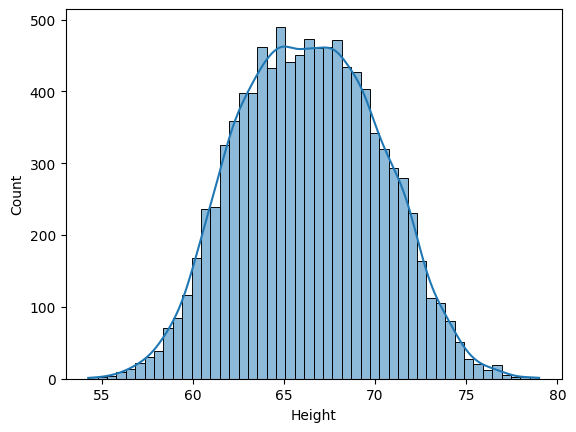

In [ ]:
sn.histplot(h.Height, kde=True)
#either kde=False or by default it will not draw line connecting all the bars

In [ ]:
mean = h.Height.mean()
mean

66.367559754866

In [ ]:
std_dev = h.Height.std()
std_dev

3.847528120795573

In [ ]:
mean - 3*std_dev

54.824975392479274

In [ ]:
mean + 3*std_dev

77.91014411725271

In [ ]:
h[(h.Height < 54.82) | (h.Height > 77.91)]
#this are outliers, outside the 3 std dev limit

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [ ]:
h_no_outlier = h[(h.Height >= 54.82) & (h.Height <= 77.91)]
h_no_outlier

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [ ]:
h.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [ ]:
#adding z score column
h['zscore'] = (h.Height-h.Height.mean())/h.Height.std()
h.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [ ]:
h[(h.zscore>3) | (h.zscore<-3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [ ]:
h_no_outlier_z = h[(h.zscore <= 3) & (h.zscore >= -3)]
h_no_outlier_z

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [13]:
bhp = pd.read_csv(r"C:\Users\Therton_F\Downloads\DA\Python\CB\bhp.csv")
bhp.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
bhp.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [ ]:
pmin,pmax = bhp.price_per_sqft.quantile([0.001,0.999])
pmin, pmax

(1366.184, 50959.36200000098)

In [ ]:
bhp_no_outlier_1= bhp[(bhp.price_per_sqft >= pmin) & (bhp.price_per_sqft <= pmax)]
bhp_no_outlier_1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [ ]:
bhp_no_outlier_1.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [ ]:
meanbhp = bhp_no_outlier_1.price_per_sqft.mean()
meanbhp

6663.6537351958705

In [ ]:
stdbhp = bhp_no_outlier_1.price_per_sqft.std()
stdbhp

4141.020700174613

In [ ]:
meanbhp - 4*stdbhp

-9900.429065502582

In [ ]:
meanbhp + 4*stdbhp

23227.73653589432

In [ ]:
bhp_no_outlier_2 = bhp_no_outlier_1[(bhp_no_outlier_1.price_per_sqft >= -9900.42) & (bhp_no_outlier_1.price_per_sqft <= 23227.73)]
bhp_no_outlier_2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

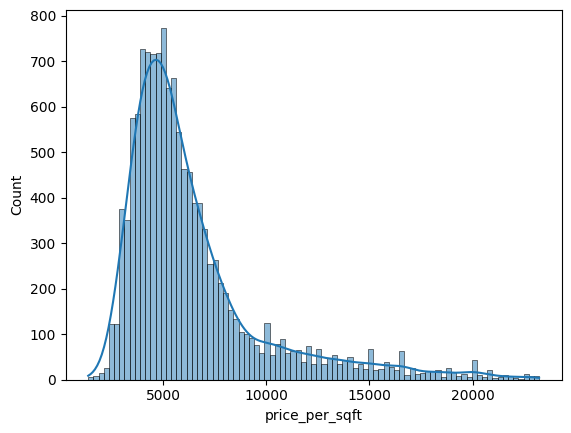

In [ ]:
sn.histplot(bhp_no_outlier_2.price_per_sqft, kde=True)

In [ ]:
bhp_no_outlier_1['zscore'] = (bhp_no_outlier_1.price_per_sqft-bhp_no_outlier_1.price_per_sqft.mean())/bhp_no_outlier_1.price_per_sqft.std()
bhp_no_outlier_1

<ipython-input-146-186d405fad2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhp_no_outlier_1['zscore'] = (bhp_no_outlier_1.price_per_sqft-bhp_no_outlier_1.price_per_sqft.mean())/bhp_no_outlier_1.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [ ]:
bhp_no_outlier_3 = bhp_no_outlier_1[(bhp_no_outlier_1.zscore >= -4) & (bhp_no_outlier_1.zscore <= 4)]
bhp_no_outlier_3

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [14]:
l = pd.read_csv(r"C:\Users\Therton_F\Downloads\DA\Python\CB\revenue.csv")
l

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


<Axes: xlabel='company'>

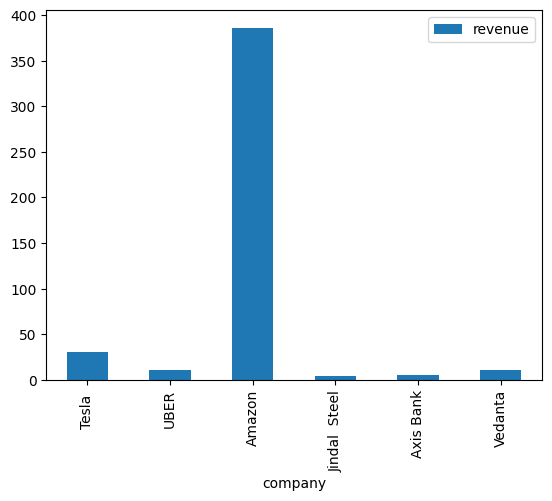

In [ ]:
l.plot(x='company', y='revenue', kind='bar')

<Axes: xlabel='company'>

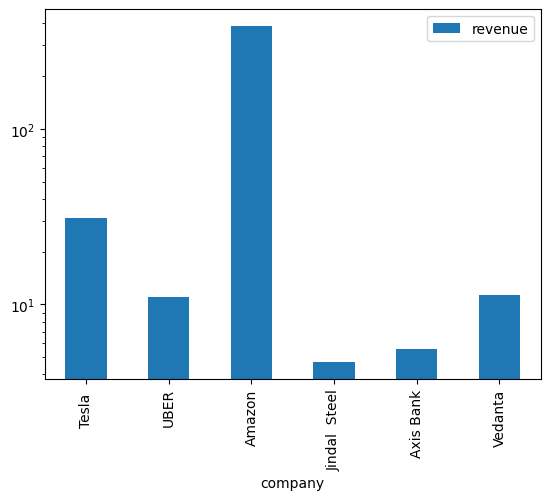

In [ ]:
l.plot(x='company', y='revenue', kind='bar', logy=True)

In [16]:
l2 = pd.read_csv(r"C:\Users\Therton_F\Downloads\DA\Python\CB\log income.csv", index_col=None, names=["income","count"],skiprows=1)
l2.head()

,income,count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6047
4,25000,6097


<ipython-input-162-ea2a8141a129>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')


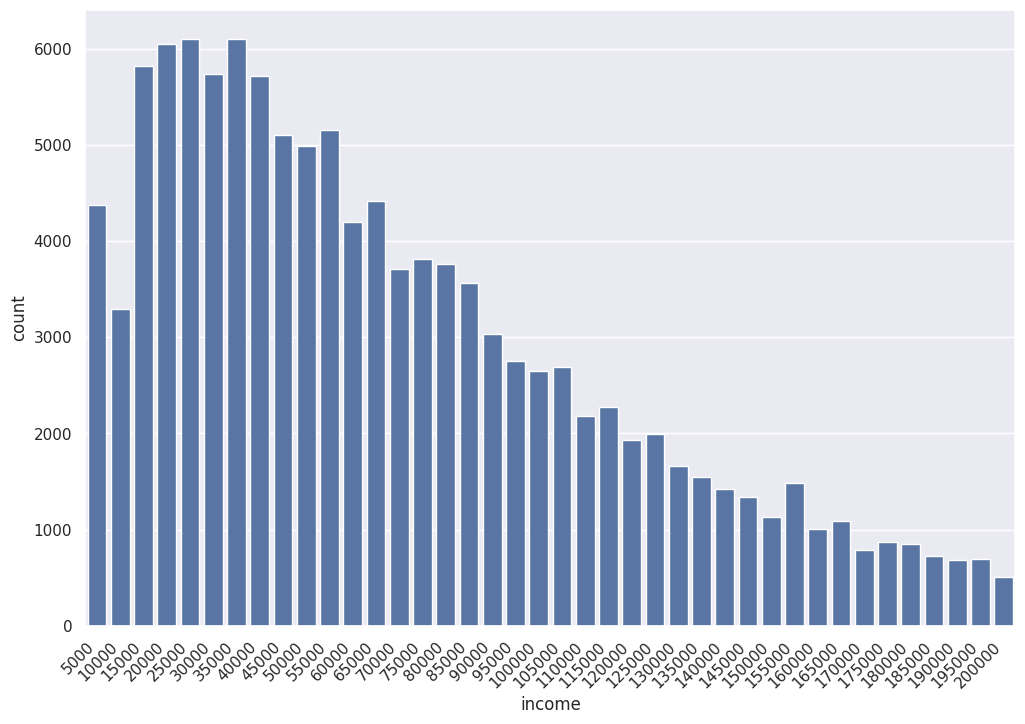

In [ ]:
sn.set(rc={'figure.figsize':(12, 8)})
g = sn.barplot(x='income',y='count',data=l2)
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.show()

<ipython-input-163-23930dbacc68>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')


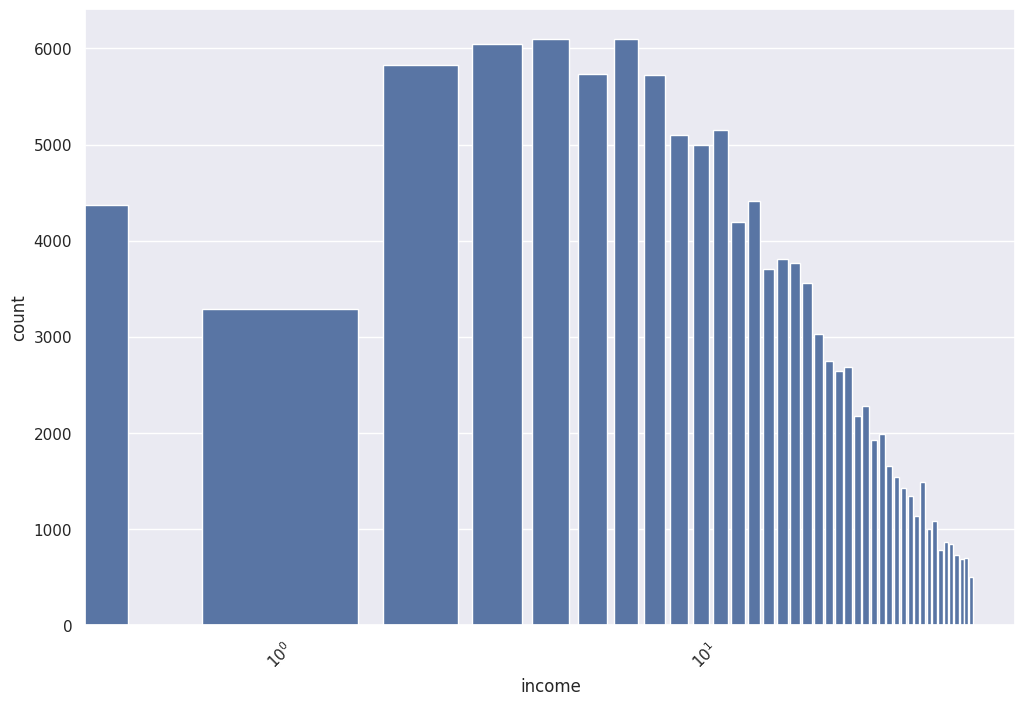

In [ ]:
sn.set(rc={'figure.figsize':(12, 8)})
g = sn.barplot(x='income',y='count',data=l2)
g.set_xticklabels(g.get_xticklabels(),rotation=45,horizontalalignment='right')
g.set(xscale='log')
plt.show()

In [2]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [3]:
cosine_similarity([[3,1]],[[6,2]])

array([[1.]])

In [4]:
cosine_distances([[3,1]],[[6,2]])

array([[1.11022302e-16]])

In [5]:
cosine_similarity([[3,1]],[[3,2]])

array([[0.96476382]])

In [6]:
doc1 = """
iphone sales contributed to 70% of revenue. iphone demand is increasing by 20% yoy.
the main competitor phone galaxy recorded 5% less growth compared to iphone"
"""

doc2 = """
The upside pressure on volumes for the iPhone 12 series, historical outperformance
in the July-September time period heading into launch event, and further catalysts in relation
to outperformance for iPhone 13 volumes relative to lowered investor expectations implies a
very attractive set up for the shares.
"""

doc3 = """
samsung's flagship product galaxy is able to penetrate more into asian markets compared to
iphone. galaxy is redesigned with new look that appeals young demographics. 60% of samsung revenues
are coming from galaxy phone sales
"""

doc4 = """
Samsung Electronics unveils its Galaxy S21 flagship, with modest spec improvements
and a significantly lower price point. Galaxy S21 price is lower by ~20% (much like the iPhone 12A),
which highlights Samsung's focus on boosting shipments and regaining market share.
"""

In [7]:
import pandas as pd

df2=pd.DataFrame([
                   {'iphone':3,'galaxy':1},
                   {'iphone':2,'galaxy':0},
                   {'iphone':1,'galaxy':3},
                   {'iphone':1,'galaxy':2}
                ],
                index = ["doc1","doc2","doc3","doc4"]
)

df2

,iphone,galaxy
doc1,3,1
doc2,2,0
doc3,1,3
doc4,1,2


In [8]:
df2.loc["doc1"]

iphone    3
galaxy    1
Name: doc1, dtype: int64

In [9]:
df2.loc['doc1':'doc1']

,iphone,galaxy
doc1,3,1


In [10]:
#we are using doc1 2 times bcz cosine fn will only take 2 dimentional array
cosine_similarity(df2.loc['doc1':'doc1'],df2.loc['doc2':'doc2'])

array([[0.9486833]])

In [11]:
cosine_similarity(df2.loc['doc1':'doc1'],df2.loc['doc3':'doc3'])

array([[0.6]])

In [12]:
cosine_distances(df2.loc['doc4':'doc4'],df2.loc['doc3':'doc3'])

array([[0.01005051]])

In [17]:
df3 = pd.read_csv(r"C:\Users\Therton_F\Downloads\DA\Python\CB\tmdb\tmdb_5000_movies.csv")
df3.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [18]:
#adding new column with revenue in million
df3['revenue_mln']=df3['revenue'].apply(lambda x: x/1000000)
df3.revenue_mln.describe()

count    3229.000000
mean      121.242957
std       186.302864
min         0.000005
25%        17.000000
50%        55.184721
75%       146.292009
max      2787.965087
Name: revenue_mln, dtype: float64

In [19]:
#creting variable to store values from describe table
# _ is used to store a values that you dont care,,, *_means all the remaining _
_, mean, std, *_ = df3.revenue_mln.describe()

In [20]:
mean,std

(121.2429572613812, 186.30286401426588)

In [21]:
def get_z_score(value,mean,std):
  return (value-mean)/std

In [22]:
df3['z_score']=df3.revenue_mln.apply(lambda x: get_z_score(x, mean, std))
df3.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,14.313908
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,4.507483


In [24]:
df3[df3.z_score>3].head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,14.313908
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,4.507483


In [26]:
def get_mad(s):
  median = np.median(s)
  diff = abs(s-median)
  MAD = np.median(diff)
  return MAD

In [27]:
MAD = get_mad(df3.revenue_mln)
median = np.median(df3.revenue_mln)
MAD,median

(46.400403000000004, 55.184721)

In [28]:
def get_mod_z_score(x, median, MAD):
  return 0.6745*(x-median)/MAD

In [29]:
df3['mod_z_score']=df3.revenue_mln.apply(lambda x: get_mod_z_score(x, median, MAD))
df3.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,14.313908,39.725094
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,4.507483,13.167394


In [33]:
df3[df3.mod_z_score>3.5]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,14.313908,39.725094
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,4.507483,13.167394
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,880.674609,4.076328,11.999743
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,1084.939099,5.172739,14.969037
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,139,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,890.871626,4.131062,12.147972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,11000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.starwars.com/films/star-wars-episod...,11,"[{""id"": 803, ""name"": ""android""}, {""id"": 4270, ...",en,Star Wars,Princess Leia is captured and held hostage by ...,126.393695,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...",...,121,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6624,775.398007,3.511245,10.469389
2426,10500000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://www.et20.com/,601,"[{""id"": 455, ""name"": ""farewell""}, {""id"": 1007,...",en,E.T. the Extra-Terrestrial,After a gentle alien becomes stranded on Earth...,56.105798,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,115,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He is afraid. He is alone. He is three million...,E.T. the Extra-Terrestrial,7.3,3269,792.910554,3.605246,10.723960
2556,5000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",NaN,9671,"[{""id"": 242, ""name"": ""new york""}, {""id"": 549, ...",en,Crocodile Dundee,When a New York reporter plucks crocodile hunt...,16.072466,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,97,"[{""iso_639_1"": ""en"", ""name